# Thresholding
###### by: João Ataíde
---

In [1]:
import time

#Importando as bibliotecas
import cv2, time
import numpy as np

#image configs
import matplotlib.pyplot as plt
import matplotlib


matplotlib.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'
%matplotlib inline

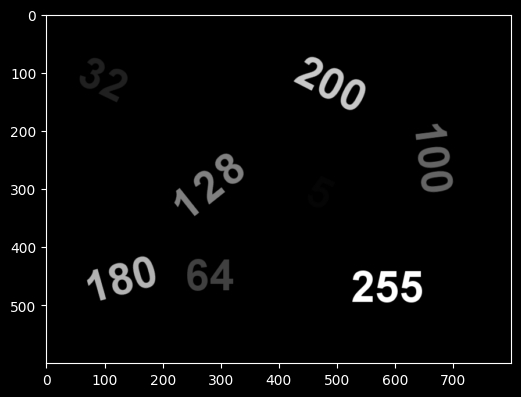

In [2]:
DATA_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w3 - Binary Image Processing\data"

imagePath = f"{DATA_PATH}\\images\\threshold.png"
src = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)
plt.imshow(src);

## Thresholding using for loops

In [31]:
#parameters
thresh = 100
maxValue = 255

In [32]:
def thresholdingUsinglopp(src, thresh, maxValue):

    dst = src.copy()
    height, width = src.shape[:2]

    for i in range(height):
        for j in range(width):
            if src[i,j] > thresh:
                dst[i,j] = maxValue
            else:
                dst[i,j] = 0

    return dst

In [33]:
t = time.time()
dst = thresholdingUsinglopp(src, thresh, maxValue)
print("Time taken = {} seconds".format(time.time() - t))

Time taken = 0.4795069694519043 seconds


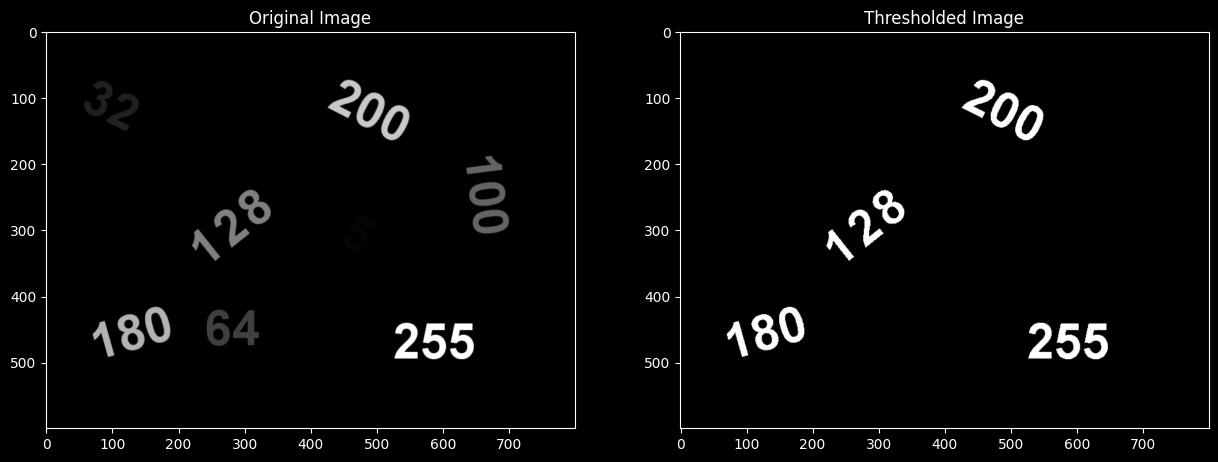

In [34]:
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(src);plt.title("Original Image");
plt.subplot(122);plt.imshow(dst);plt.title("Thresholded Image");

In [35]:
def thresholdUsingVectors(src, thresh, maxValue):
    # Create a black output image ( all zeros )
    dst = np.zeros_like(src)

    # Find pixels which have values>threshold value
    thresholdedPixels = src > thresh

    # Assign those pixels maxValue
    dst[thresholdedPixels] = maxValue

    return dst

In [36]:
t = time.time()
dst = thresholdUsingVectors(src, thresh, maxValue)
print("Time taken = {} seconds".format(time.time() - t))

Time taken = 0.0 seconds


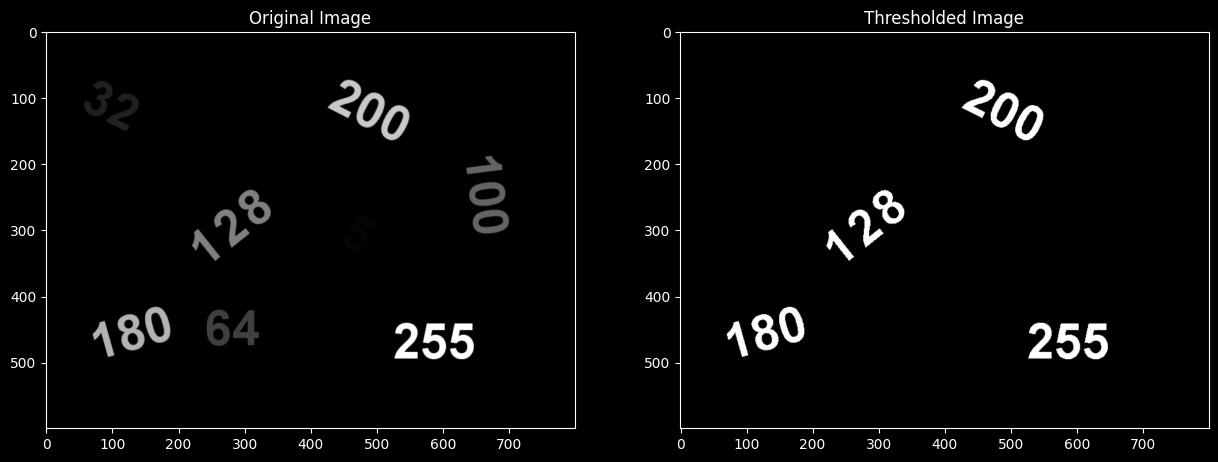

In [37]:
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(src);plt.title("Original Image");
plt.subplot(122);plt.imshow(dst);plt.title("Thresholded Image");

## Thresholding using OpenCV

In [38]:
t = time.time()
th, dst = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY)
print("Time taken = {} seconds".format(time.time() - t))

Time taken = 0.0030002593994140625 seconds


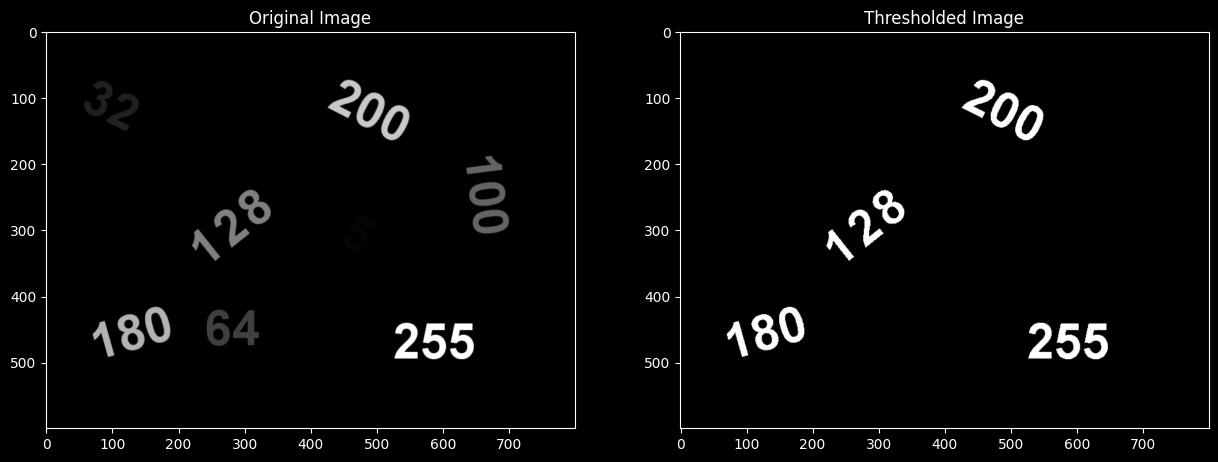

In [39]:
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(src);plt.title("Original Image");
plt.subplot(122);plt.imshow(dst);plt.title("Thresholded Image");

## Comparison of runtimes OpenCV function vs our implementation

In [40]:
time_opencv = 0
time_loops = 0
time_vector = 0
n_samples = 10

In [43]:
for i in range(n_samples):

    t = time.time()
    dst = thresholdingUsinglopp(src, thresh, maxValue)
    time_loops += time.time() - t

    t = time.time()
    dst = thresholdUsingVectors(src, thresh, maxValue)
    time_vector += time.time() - t

    t = time.time()
    th, dst = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY)
    time_opencv += time.time() - t

In [44]:
print("Average time taken by For Loop Code = {} seconds".format(time_loops/n_samples))
print("Average time taken by Vectorized Code = {} seconds".format(time_vector/n_samples))
print("Average time taken by OpenCV Code = {} seconds".format(time_opencv/n_samples))

Average time taken by For Loop Code = 0.9994497537612915 seconds
Average time taken by Vectorized Code = 0.0008902311325073242 seconds
Average time taken by OpenCV Code = 0.0004146099090576172 seconds


## Other Thresholding types

In [ ]:
thresh = 100
maxValue = 150

In [45]:
th, dst_bin = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY)

In [46]:
th, dst_bin_inv = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY_INV)

In [47]:
th, dst_trunc = cv2.threshold(src, thresh, maxValue, cv2.THRESH_TRUNC)

In [48]:
th, dst_to_zero = cv2.threshold(src, thresh, maxValue, cv2.THRESH_TOZERO)

In [49]:
th, dst_to_zero_inv = cv2.threshold(src, thresh, maxValue, cv2.THRESH_TOZERO_INV)

Threshold Value = 100, Max Value = 255


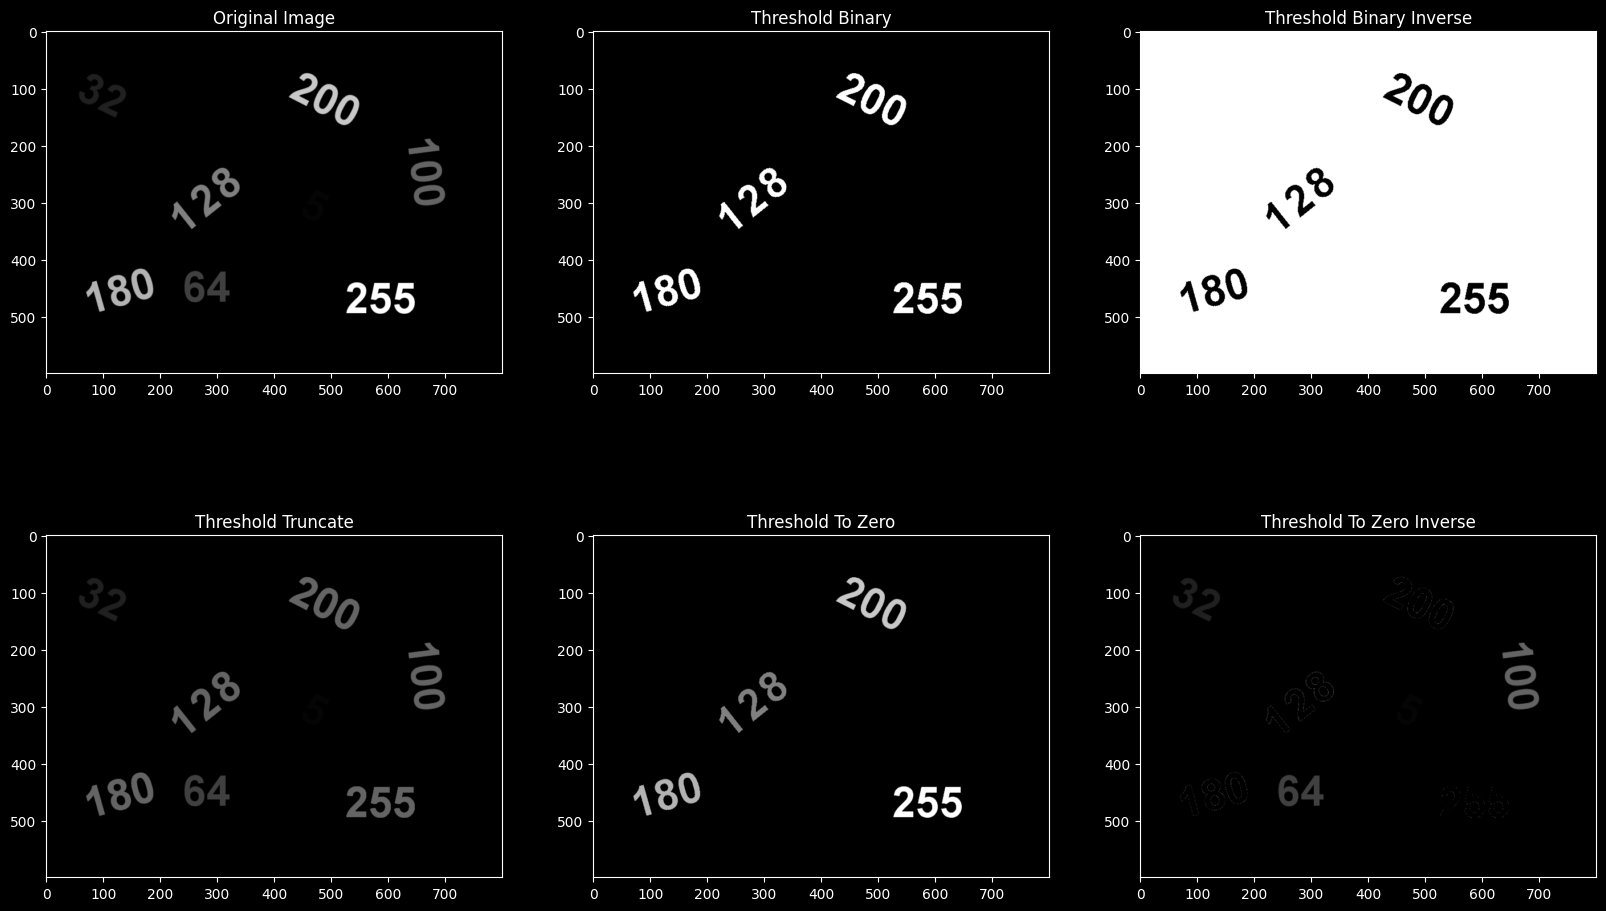

In [52]:
print("Threshold Value = {}, Max Value = {}".format(thresh, maxValue))
plt.figure(figsize=[20,12])

plt.subplot(231);plt.imshow(src, cmap='gray',
                            vmin=0, vmax=255)
plt.title("Original Image");

plt.subplot(232);plt.imshow(dst_bin, cmap='gray',
                            vmin=0, vmax=255)
plt.title("Threshold Binary")

plt.subplot(233);plt.imshow(dst_bin_inv, cmap='gray',
                            vmin=0, vmax=255)
plt.title("Threshold Binary Inverse")

plt.subplot(234);plt.imshow(dst_trunc, cmap='gray',
                            vmin=0, vmax=255)
plt.title("Threshold Truncate");

plt.subplot(235);plt.imshow(dst_to_zero, cmap='gray',
                            vmin=0, vmax=255)
plt.title("Threshold To Zero")

plt.subplot(236);plt.imshow(dst_to_zero_inv, cmap='gray',
                            vmin=0, vmax=255)
plt.title("Threshold To Zero Inverse");

https://docs.opencv.org/4.1.0/d7/d4d/tutorial_py_thresholding.html
https://en.wikipedia.org/wiki/Thresholding_(image_processing)
https://pysource.com/2018/02/01/basic-thresholding-opencv-3-4-with-python-3-tutorial-10/
https://www.youtube.com/watch?v=jXzkxsT9gxM
https://www.youtube.com/watch?v=mIza_x78Aqw